# Machine Learning Project

At this stage we are creating the tools to navigate the data.

The original dataset files can be located at the following location:
https://physionet.org/pn6/capslpdb/

## Data Extraction

We have successfully been able to extract information for the majority of the test individuals. It is unclear why some files won't open. It could be attributed to file corruption, however the root cause is unclear.

Here we have created some functions to read the edf files and save them as *pickled* dictionaries on my hard drive.  

In [1]:
import pyedflib
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle

In [2]:
folder = r"D:\Projects\MLIA Set\CAP Sleep"

In [3]:
def process_file(record_loc):
    f = pyedflib.EdfReader(record_loc)
    file_dict = {
        #"FileInfoLong":f.file_info_long(),
        "FileDuration":f.getFileDuration(),
        "Header":f.getHeader(),
        "SignalHeaders":{x: f.getSignalHeader(chn=x) for x in range(f.signals_in_file)},
        "Data":{x: f.readSignal(chn=x,start=0,n=None) for x in range(f.signals_in_file)}
    }
    f._close()
    return file_dict

def process_files(folder):
    data = {}
    errors = []
    for file in os.listdir(folder):
        filename, extension = os.path.splitext(file)
        if extension == ".edf":
            record_loc = os.path.join(folder,file)
            try:
                print("\n========================\nProcessing:",file)
                file_dict = process_file(record_loc)
                data[filename] = file_dict
            except:
                print("Error processing file:",file)
                errors.append(file)
    return data, errors

def process_files_and_pickle(folder):
    errors = []
    for file in os.listdir(folder):
        filename, extension = os.path.splitext(file)
        if extension == ".edf":
            if not os.path.isfile(os.path.join(folder,"pkl",filename+".pkl")):
                record_loc = os.path.join(folder,file)
                try:
                    print("\n========================\nProcessing:",file)
                    file_dict = process_file(record_loc)
                    pickle.dump(file_dict,open(os.path.join(folder,"pkl",filename+".pkl"),"ab"))
                except:
                    print("Error processing file:",file)
                    errors.append(file)
            #else:
            #    print("\n========================\nFile already processed:",file)
    return errors

def load_file(record_loc):
    folder = os.path.dirname(record_loc)
    filename, extension = os.path.splitext(record_loc)
    filename = filename.replace(folder+"\\","")
    if extension == ".edf":
        pkl_file = os.path.join(folder,"pkl",filename+".pkl")
        if os.path.isfile(pkl_file):
            return pickle.load(open(pkl_file,"rb"))
        else:
            print("Pickle not found! Attempting to parse .edf file.")
            return process_file(record_loc)
    elif extension == ".pkl":
        return pickle.load(open(record_loc,"rb"))
    else:
        print("Unrecognized file:",record_loc)
        

In [13]:
errors = process_files_and_pickle(folder)


Processing: brux1.edf
Error processing file: brux1.edf

Processing: brux2.edf

Processing: ins1.edf
Error processing file: ins1.edf

Processing: ins2.edf

Processing: ins3.edf

Processing: ins4.edf

Processing: ins5.edf

Processing: ins6.edf

Processing: ins7.edf

Processing: ins8.edf

Processing: ins9.edf
Error processing file: ins9.edf

Processing: n1.edf

Processing: n10.edf

Processing: n11.edf

Processing: n12.edf
Error processing file: n12.edf

Processing: n13.edf
Error processing file: n13.edf

Processing: n14.edf
Error processing file: n14.edf

Processing: n15.edf

Processing: n16.edf

Processing: n2.edf

Processing: n3.edf

Processing: n4.edf

Processing: n5.edf

Processing: n6.edf

Processing: n7.edf

Processing: n8.edf

Processing: n9.edf

Processing: narco1.edf

Processing: narco2.edf

Processing: narco3.edf

Processing: narco4.edf

Processing: narco5.edf

Processing: nfle1.edf

Processing: nfle10.edf

Processing: nfle11.edf

Processing: nfle12.edf

Processing: nfle13.edf


These are the files that did not load:

In [101]:
_ = [print(error) for error in errors]

brux1.edf
ins1.edf
ins9.edf
n12.edf
n13.edf
n14.edf
nfle8.edf
nfle9.edf
plm1.edf
rbd16.edf
sdb1.edf
sdb4.edf


## Data Access and Visualization

There is a significant amount of information on each edf file. I have taken the data for each file and created funtions to plot it. It should give us some intuition about what we are seeing. 

In [4]:
def plot_signal(record_dict, channel,filename = "", normalize=True):
    if filename!="":
        prefix = filename + ", channel=" + str(channel) + " -> "
    else:
        prefix = "channel=" + str(channel) + " -> "
    if normalize:
        gain = (record_dict["SignalHeaders"][channel]["physical_max"]-record_dict["SignalHeaders"][channel]["physical_min"])/(record_dict["SignalHeaders"][channel]["digital_max"]-record_dict["SignalHeaders"][channel]["digital_min"])
        data = record_dict["Data"][channel] * gain
    else:
        data = record_dict["Data"][channel]
    plt.figure(figsize=(15,5))
    plt.title(prefix + record_dict["SignalHeaders"][channel]["transducer"] + " - " + record_dict["SignalHeaders"][channel]["prefilter"])
    plt.plot(data, label=record_dict["SignalHeaders"][channel]["transducer"])
    plt.xlabel("Time Series->Samples (@"+str(record_dict["SignalHeaders"][channel]["sample_rate"])+"Hz)")
    plt.ylabel(record_dict["SignalHeaders"][channel]["label"] + " (" + record_dict["SignalHeaders"][channel]["dimension"] + ")    range: [" + str(record_dict["SignalHeaders"][channel]["physical_min"]) + "," + str(record_dict["SignalHeaders"][channel]["physical_max"]) + "]")
    plt.show()
    
def plot_file_signals(folder,filename, channel = None):
    record_loc = os.path.join(folder,filename)
    record = load_file(record_loc)
    if channel is None:
        for channel_ in range(len(record["Data"])):
            plot_signal(record, channel=channel_,filename=os.path.splitext(filename)[0], normalize = True)
    else:
        plot_signal(record, channel=channel,filename=os.path.splitext(filename)[0], normalize = True)

### Plotting single channel from file

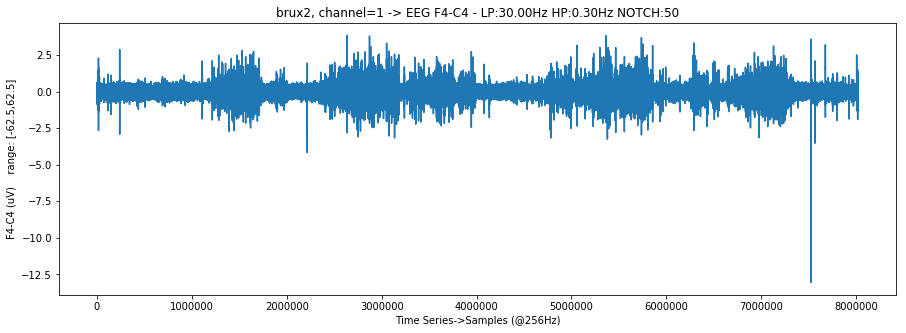

In [124]:
filename = "brux2.edf"
plot_file_signals(folder,filename, channel = 1)

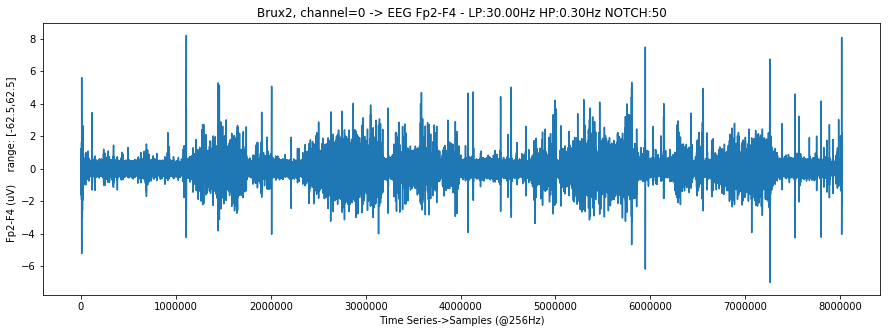

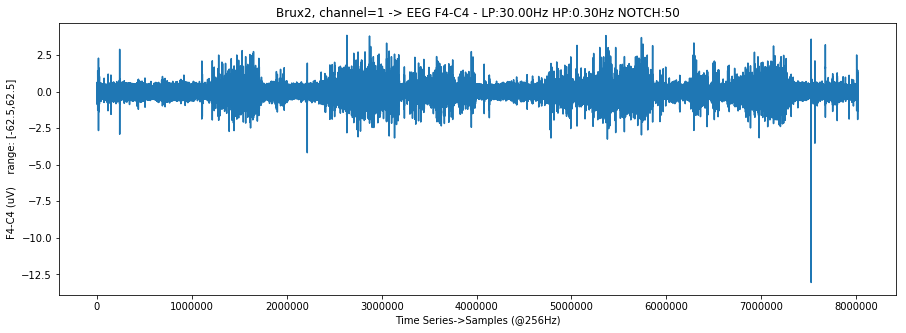

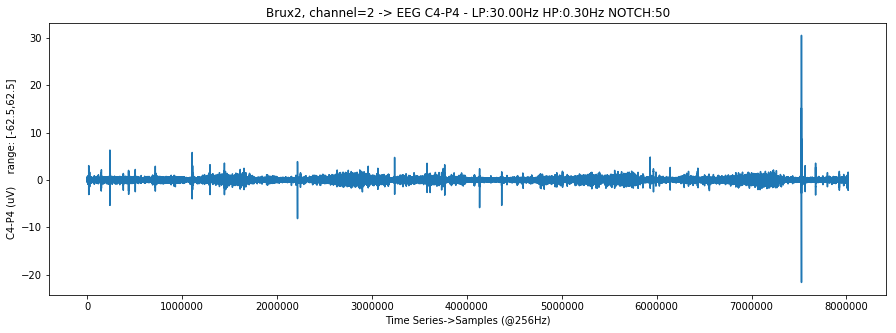

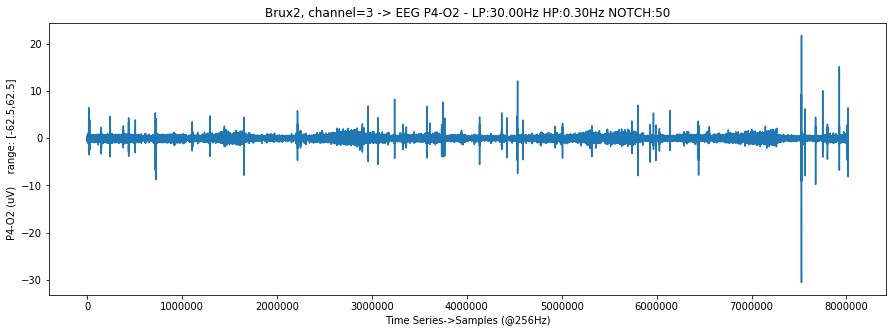

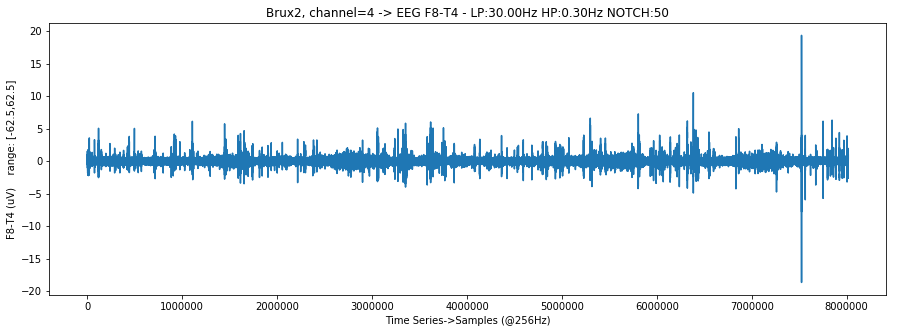

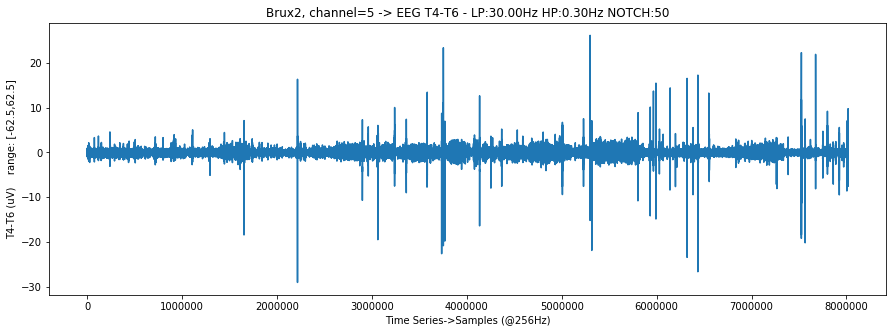

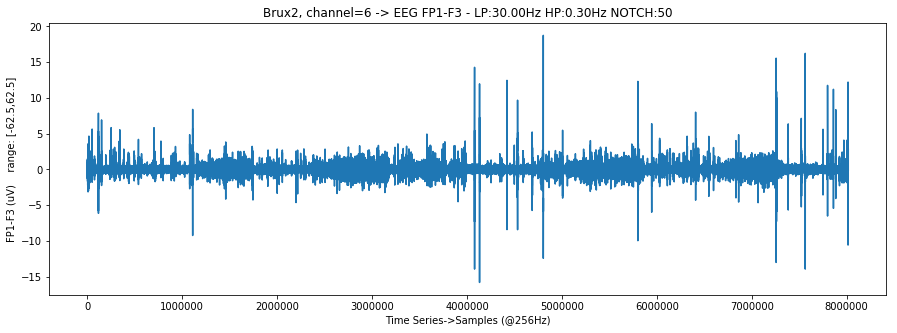

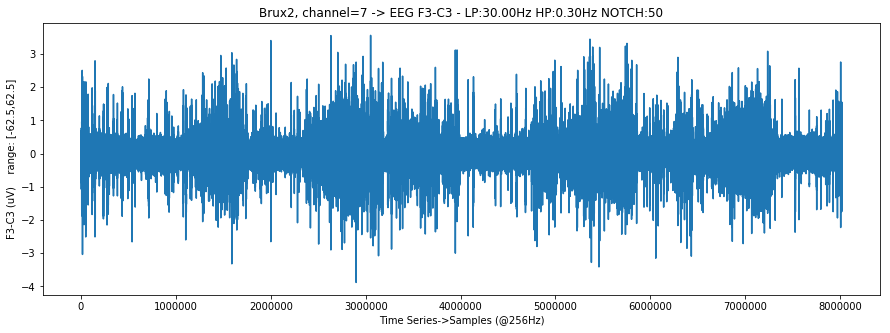

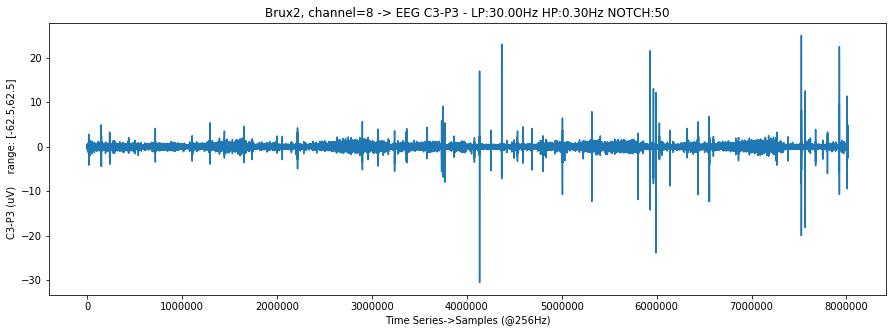

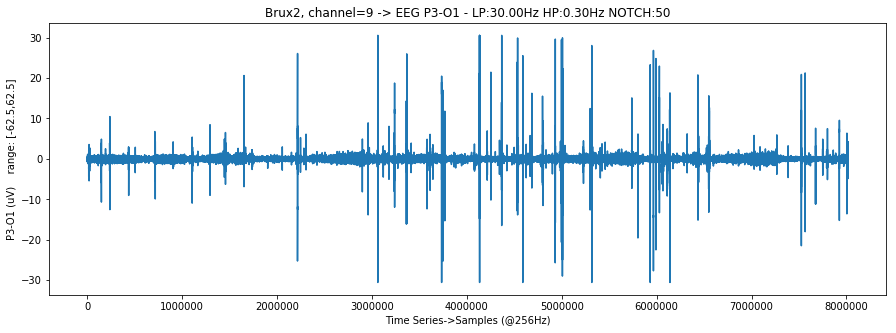

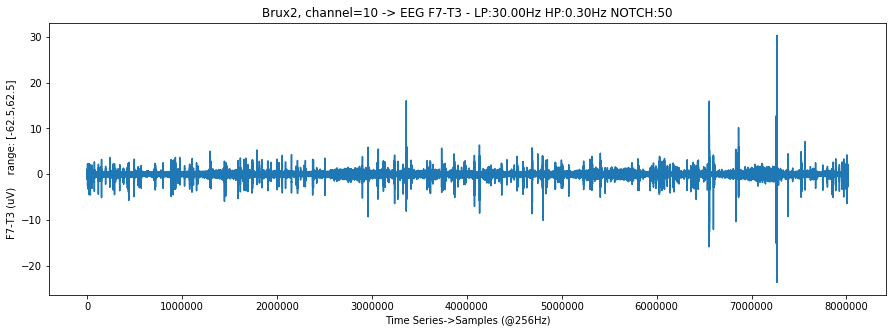

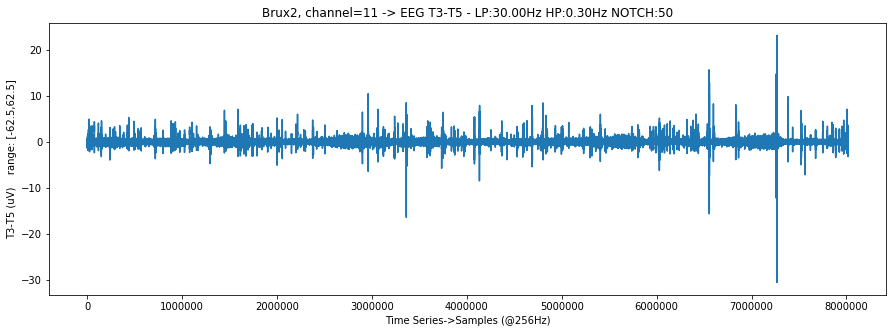

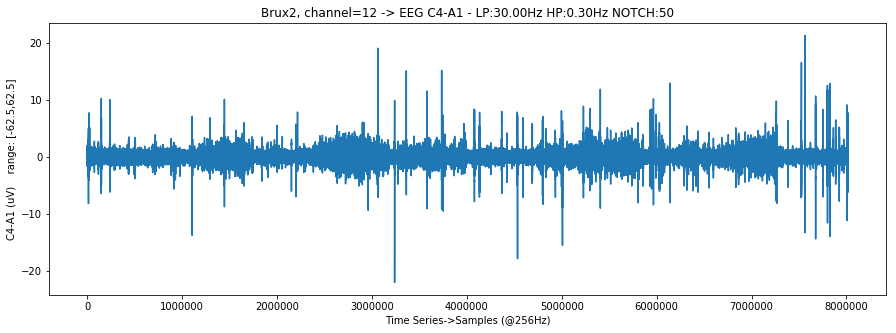

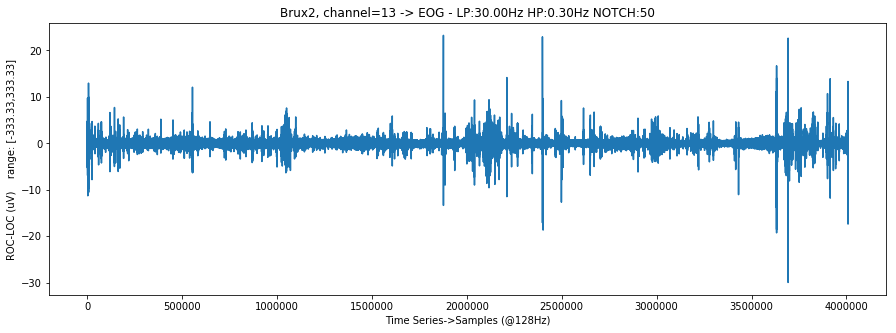

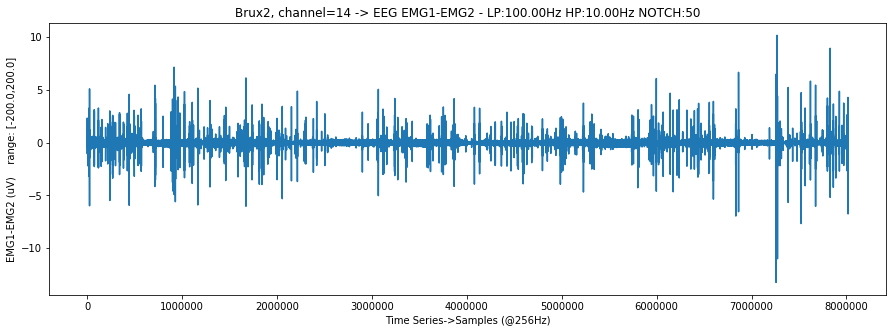

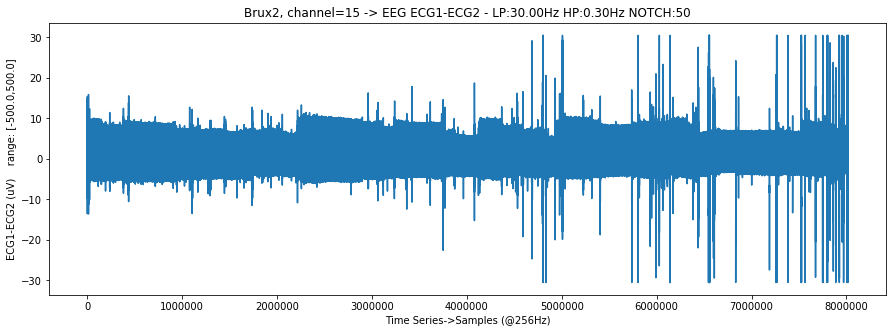

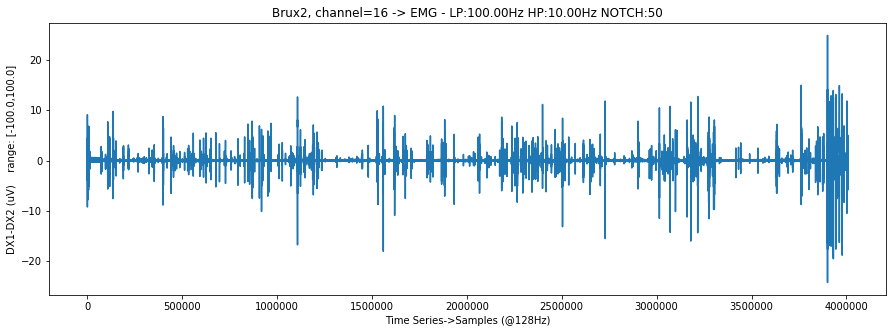

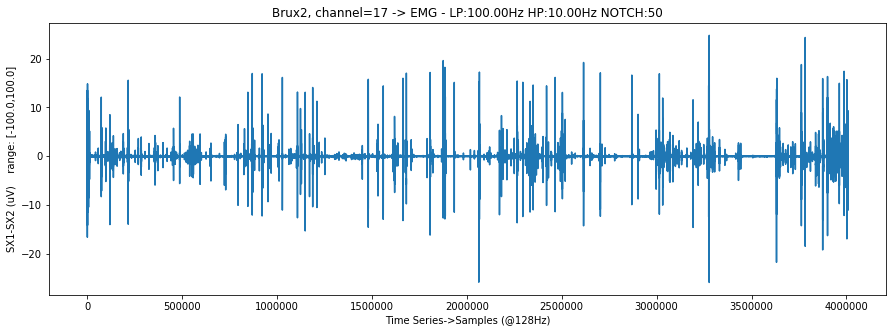

In [90]:
filename = "brux2.edf"
plot_file_signals(folder,filename, channel = None)

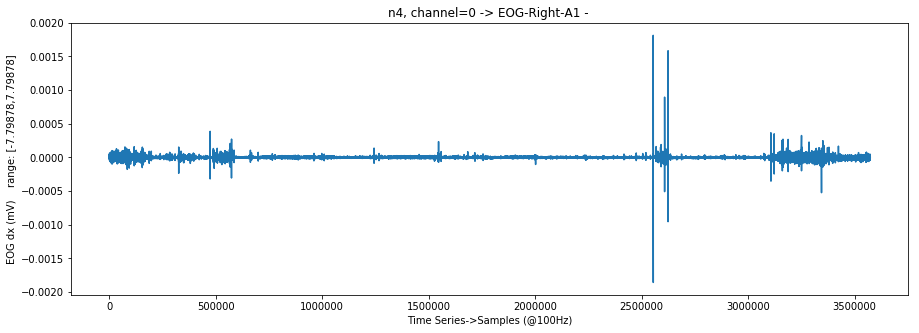

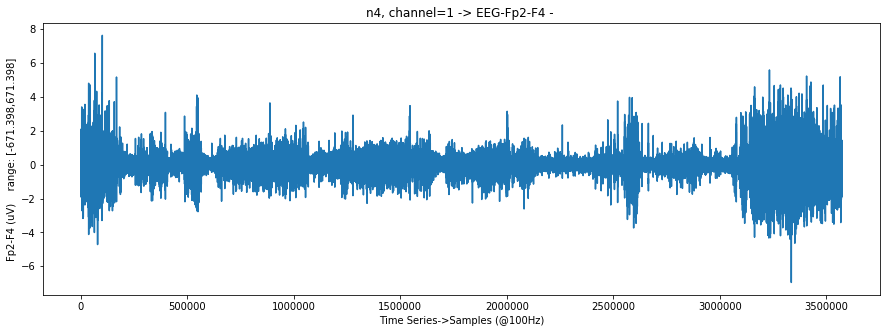

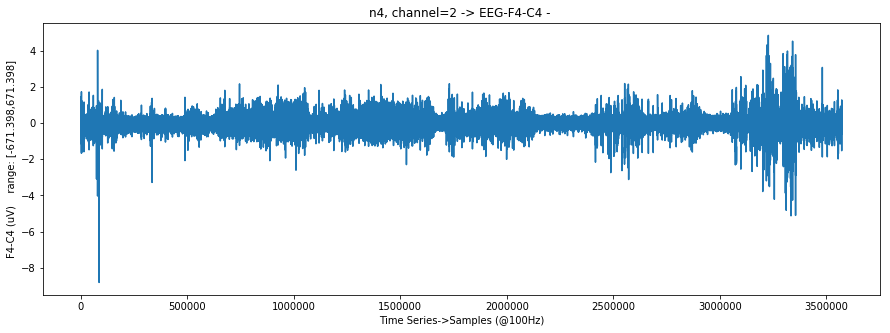

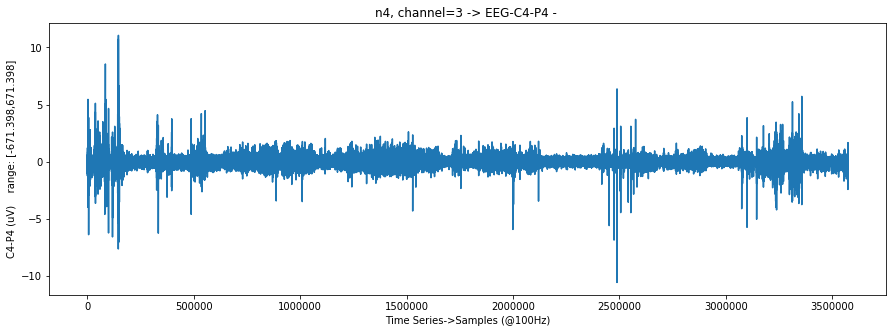

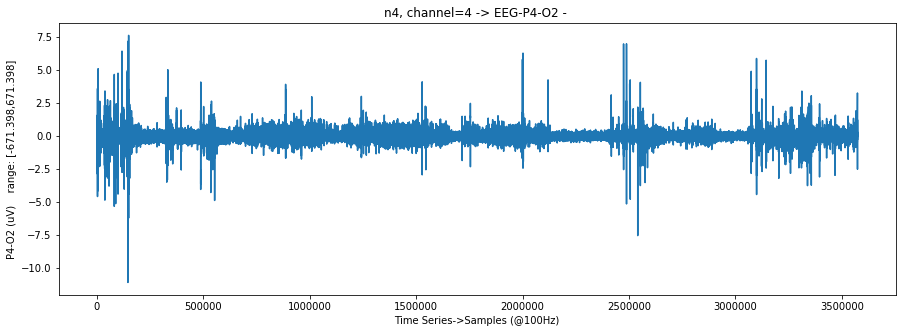

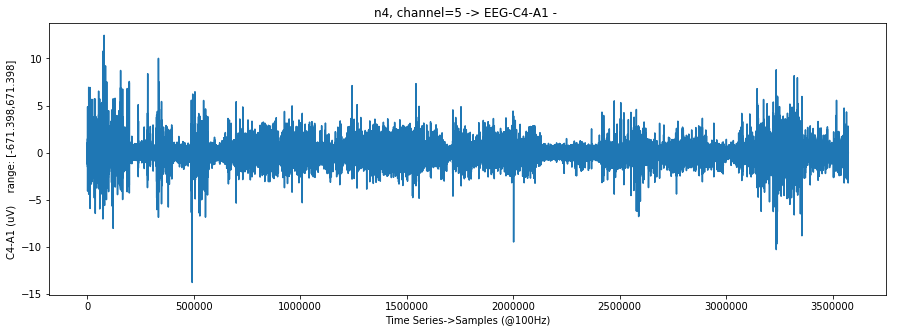

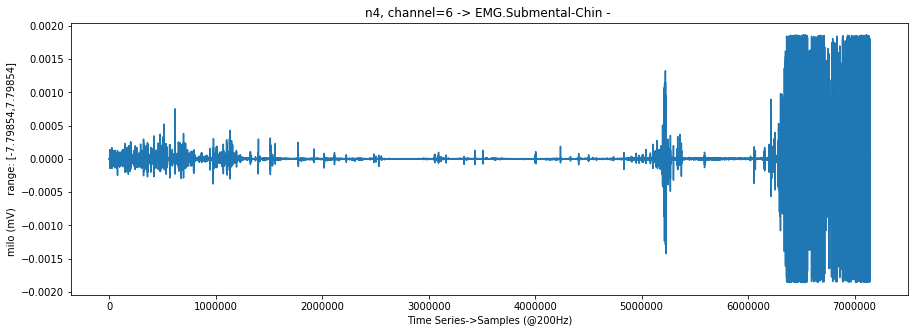

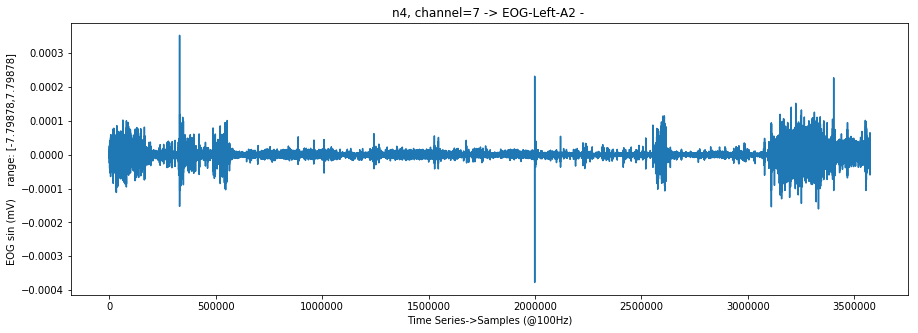

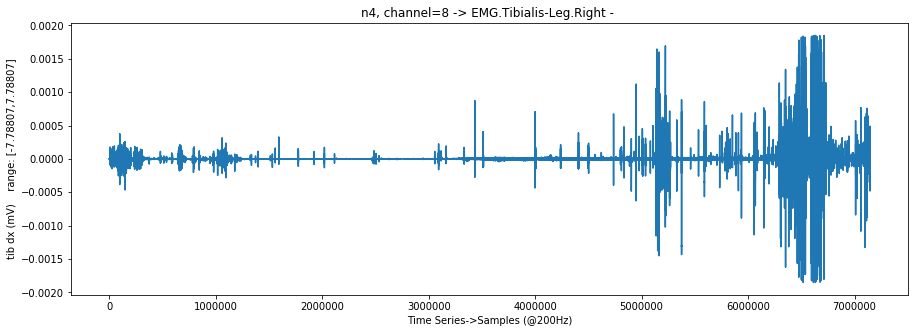

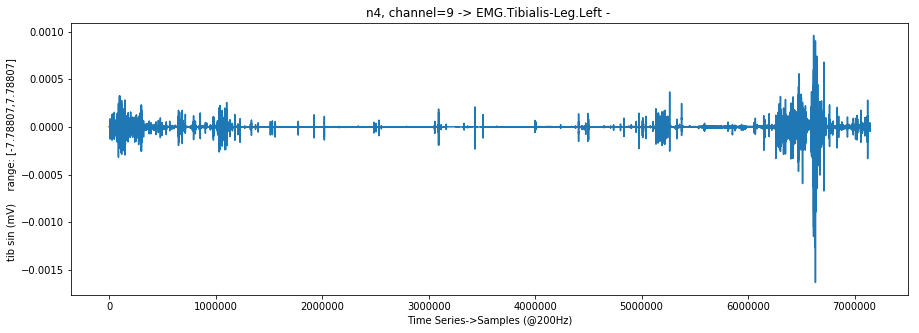

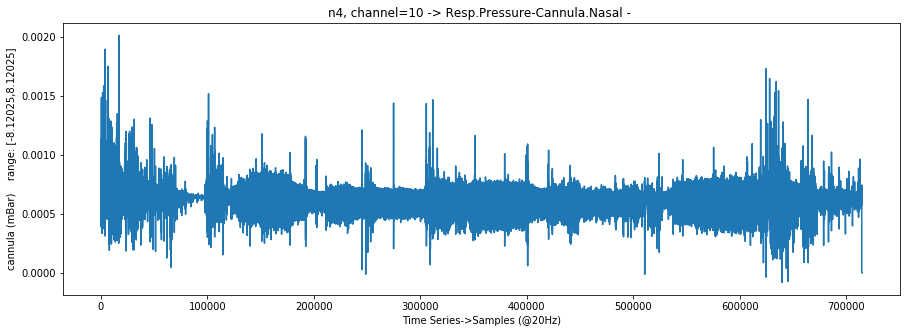

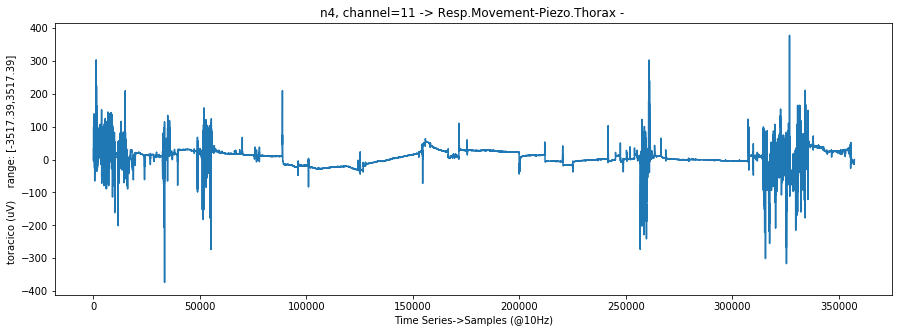

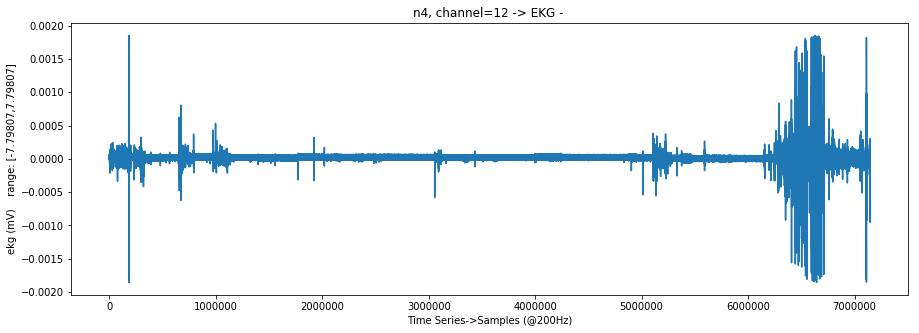

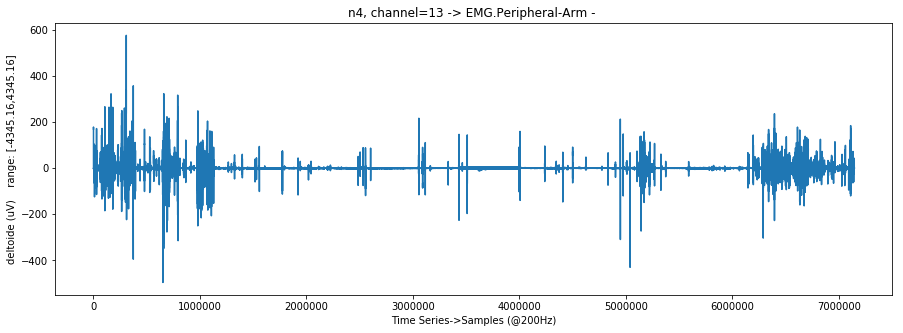

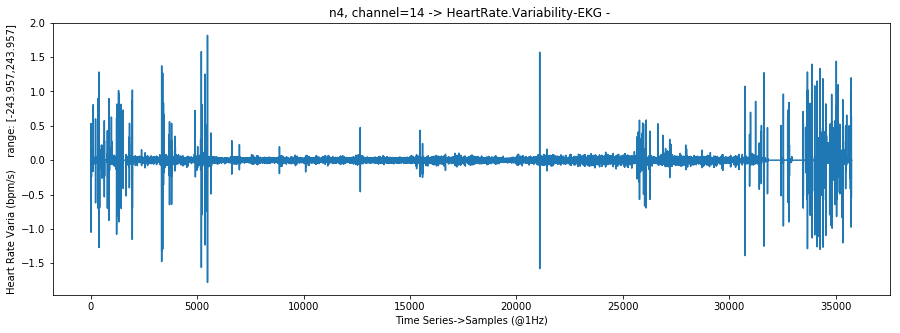

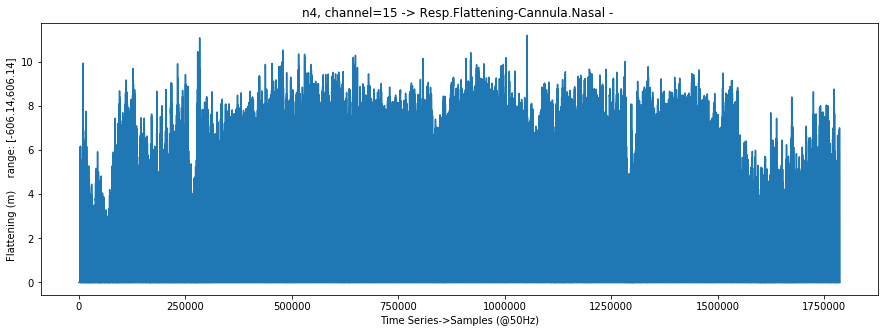

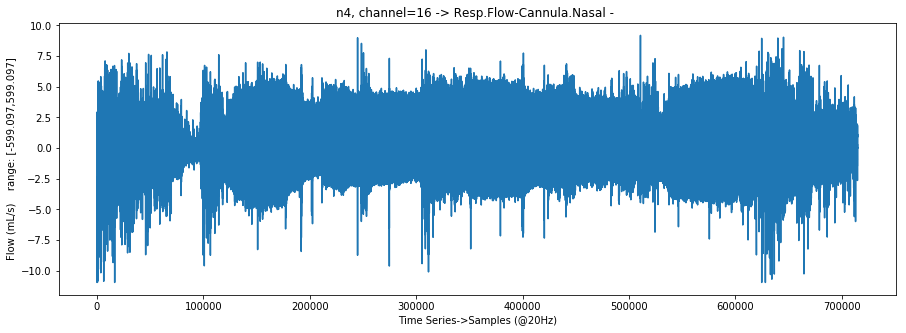

In [125]:
filename = "n4.edf"
plot_file_signals(folder,filename, channel = None)

# Creating Time Synchronized Tables
The intent of this is to create data tables that can be fed into the network.

In [351]:
import pandas as pd
import datetime as dt

In [348]:
def get_frequency(record_dict,channel):
    """
    A method used to return the parameters necessary to resample a data series in timestamp format
    """
    length = record_dict["FileDuration"]
    samples = len(record_dict["Data"][channel])

    if record_dict["SignalHeaders"][channel]["sample_rate"] != samples/length:
        print("Sample rate mismatch. Expected",str(record_dict["SignalHeaders"][channel]["sample_rate"]),"but have",str(samples/length))

    frequency = str(int(10**9*length/samples))+"N"
    
    return frequency, length, samples

def generate_series(record_dict, channel):
    """
    Returns data for the selected channel with a timestamp index based on the signal sample rate
    """
    gain = (record_dict["SignalHeaders"][channel]["physical_max"]-record_dict["SignalHeaders"][channel]["physical_min"])/(record_dict["SignalHeaders"][channel]["digital_max"]-record_dict["SignalHeaders"][channel]["digital_min"])
    data = record_dict["Data"][channel] * gain

    start_date = record_dict["Header"]["startdate"]
    frequency, length, samples = get_frequency(record_dict,channel)
    index = pd.date_range(start_date,periods=samples,freq=frequency)

    return pd.Series(data=data,index=index, name=record_dict["SignalHeaders"][channel]["transducer"])

def generate_features(record_dict):
    """
    Generate the features table
    """
    channels = len(record_dict["SignalHeaders"])
    table = pd.DataFrame()
    for i in range(channels):
        table = pd.concat((table,generate_series(record_dict, channel=i)),axis=1, join="outer")
    return table

def generate_labels(labels_loc, table):
    """
    Generate the labels table with timestamps compatible with those of the feature table
    """
    skip = 0
    error =False
    # A temp function for datetime conversion
    def time_conv(labels,t):
        return dt.datetime.strptime(labels.index[t], "%H:%M:%S")
    
    if os.path.isfile(labels_loc):
        try_again = True
        while try_again:
            try:
                labels = pd.read_csv(labels_loc,sep="\t",skip_blank_lines=True,header='infer',skiprows=skip,index_col=2)
                try_again = False
            except:
                skip += 1
                if skip >=100:
                    print("Labels Parser -> Error finding table in file. Quitting.")
                    try_again = False
                    error = True
        if not error:
            del labels.index.name

            new_index = [time_conv(labels,0)]
            offset_days = (table.index[0] - new_index[0]).days + 1
            new_index[0] += dt.timedelta(days=offset_days)
            for i in range(1,len(labels.index)):
                if time_conv(labels,i).hour < time_conv(labels,i-1).hour:
                    offset_days += 1
                new_index.append(time_conv(labels,i) + dt.timedelta(days=offset_days))

            labels.index = new_index

            return labels
        else:
            return None

def generate_table(filename, folder, save_csv = False):
    """
    This is the final output method that either returns features and labels together, or dumps
    the same o a (very very big) csv file.
    """
    record_loc = os.path.join(folder,filename)
    labels_loc = os.path.join(folder,filename.split(".")[0]+".txt")
    record_dict = load_file(record_loc)
    table = generate_features(record_dict)
    labels = generate_labels(labels_loc, table)
    final = pd.merge_asof(table,labels,left_index=True, right_index=True, direction="nearest")
    if save_csv:
        csv_file_loc = os.path.join(folder,"csv",filename.split(".")[0]+".csv")
        final.to_csv(csv_file_loc)
        return None
    else:
        return final
    
def process_files_and_csv(folder):
    """
    Go over all the files and process them to csv files (could be very time consuming)
    """
    errors = []
    for file in os.listdir(folder):
        filename, extension = os.path.splitext(file)
        if extension == ".edf":
            if not os.path.isfile(os.path.join(folder,"csv",filename+".csv")):
                record_loc = os.path.join(folder,file)
                try:
                    print("\n========================\nProcessing:",file)
                    generate_table(file, folder, save_csv = True)
                except:
                    print("Error processing file:",file)
                    errors.append(file)
            else:
                print("\n========================\nFile already exists:",file)
    return errors

In [349]:
brux2 = generate_table("brux2.edf", folder, save_csv = False)

In [352]:
sample = brux2.head(100)
sample

,EEG Fp2-F4,EEG F4-C4,EEG C4-P4,EEG P4-O2,EEG F8-T4,EEG T4-T6,EEG FP1-F3,EEG F3-C3,EEG C3-P3,EEG P3-O1,...,EOG,EEG EMG1-EMG2,EEG ECG1-ECG2,EMG,EMG,Sleep Stage,Position,Event,Duration[s],Location
2002-02-04 22:05:16.000000000,0.001398,0.225956,0.116006,0.271613,0.074076,0.809249,0.012579,0.198003,0.116938,0.270681,...,-0.077308,0.487171,1.423613,-0.689515,-1.330578,W,Unknown Position,SLEEP-S0,30,ROC-LOC
2002-02-04 22:05:16.003906250,0.033078,0.131847,0.241796,0.173777,0.334042,0.369450,0.011647,-0.021897,0.155141,0.266954,...,NaN,0.744263,0.930914,NaN,NaN,W,Unknown Position,SLEEP-S0,30,ROC-LOC
2002-02-04 22:05:16.007812500,-0.071281,-0.006057,0.418834,0.085258,0.617303,-0.101098,0.035873,-0.321929,0.192412,0.279999,...,-1.661649,0.316708,0.260321,-0.172379,-0.747286,W,Unknown Position,SLEEP-S0,30,ROC-LOC
2002-02-04 22:05:16.011718750,-0.195207,-0.121597,0.564191,0.033078,0.808317,-0.426288,0.085258,-0.566987,0.214775,0.299566,...,NaN,0.253366,-0.257526,NaN,NaN,W,Unknown Position,SLEEP-S0,30,ROC-LOC
2002-02-04 22:05:16.015625000,-0.265091,-0.205457,0.652710,0.001398,0.954606,-0.642461,0.129051,-0.728184,0.219434,0.306089,...,-2.588410,0.163011,-0.618902,0.358734,-0.259966,W,Unknown Position,SLEEP-S0,30,ROC-LOC
2002-02-04 22:05:16.019531250,-0.273477,-0.251114,0.678800,-0.017238,1.067351,-0.770114,0.136505,-0.792477,0.212911,0.293044,...,NaN,-0.076382,-0.826599,NaN,NaN,W,Unknown Position,SLEEP-S0,30,ROC-LOC
2002-02-04 22:05:16.023437500,-0.257636,-0.251114,0.661096,-0.020965,1.096236,-0.782227,0.111347,-0.770114,0.203593,0.276272,...,-2.411440,-0.138792,-0.848952,0.385756,0.186355,W,Unknown Position,SLEEP-S0,30,ROC-LOC
2002-02-04 22:05:16.027343750,-0.253909,-0.221297,0.630347,-0.006988,1.030080,-0.698367,0.091780,-0.712344,0.200798,0.273477,...,NaN,-0.183504,-0.730667,NaN,NaN,W,Unknown Position,SLEEP-S0,30,ROC-LOC
2002-02-04 22:05:16.031250000,-0.263227,-0.197071,0.614507,0.007920,0.945288,-0.608917,0.101098,-0.677868,0.199866,0.280931,...,-2.154369,-0.131341,-0.608656,0.379233,0.102496,W,Unknown Position,SLEEP-S0,30,ROC-LOC
2002-02-04 22:05:16.035156250,-0.262295,-0.197071,0.614507,0.012579,0.923857,-0.591213,0.122529,-0.680663,0.197071,0.283726,...,NaN,-0.131341,-0.588166,NaN,NaN,W,Unknown Position,SLEEP-S0,30,ROC-LOC


In [353]:
sample.to_csv(os.path.join(folder,"csv","sample.csv"))